### frequência de ocorrencia do pixel

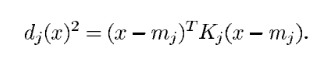

principio de extensão - 1 capitulo

Como voltar esse resultado para as cores

Converter as três as cores para uma pertinencia só, e depois volta para defuzzificar, primeiro fuzzificar

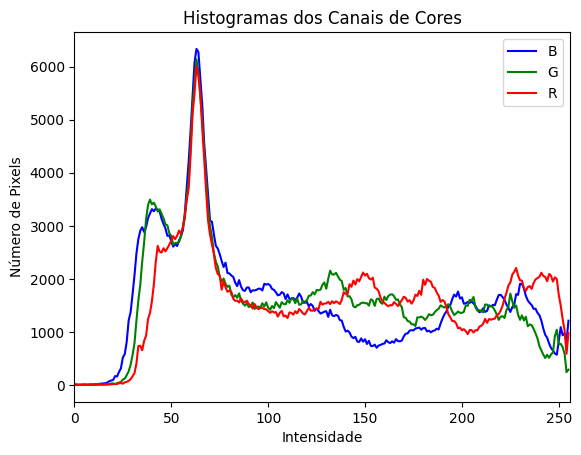

In [33]:

import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Carregar a imagem
imagem = cv2.imread('132623882_2940025776268895_9131617843404056123_n.png')

# Separar os canais de cores
b, g, r = cv2.split(imagem)

# Plotar os histogramas
plt.figure()
plt.title('Histogramas dos Canais de Cores')
plt.xlabel('Intensidade')
plt.ylabel('Número de Pixels')

# Canais e cores correspondentes
canais = [b, g, r]
cores = ['blue', 'green', 'red']
nomes_canais = ['B', 'G', 'R']

for canal, cor, nome in zip(canais, cores, nomes_canais):
    histograma = cv2.calcHist([canal], [0], None, [256], [0, 256])
    plt.plot(histograma, color=cor, label=nome)
    plt.xlim([0, 256])

plt.legend()
plt.show()


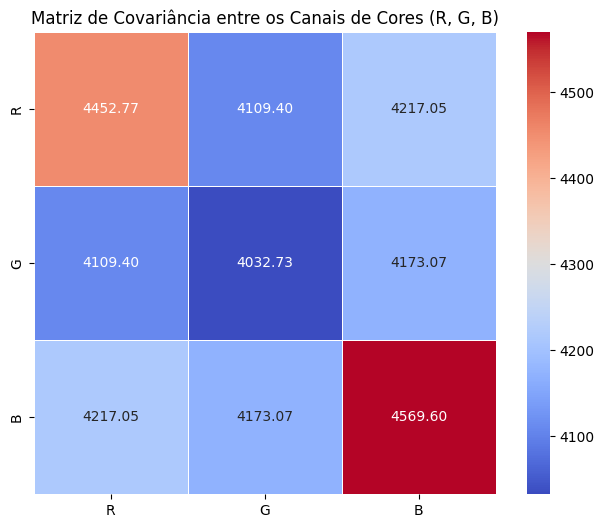

In [34]:
# Separar os canais de cores
b, g, r = cv2.split(imagem)

# Flatten os canais para criar vetores 1D
b_flat = b.flatten()
g_flat = g.flatten()
r_flat = r.flatten()

# Combinar os canais em uma única matriz 2D
matriz_canais = np.vstack((r_flat, g_flat, b_flat))

# Calcular a matriz de covariância
matriz_covariancia = np.cov(matriz_canais)

# Criar um DataFrame para exibir a matriz de covariância com rótulos detalhados
labels = ['R-R', 'R-G', 'R-B', 'G-R', 'G-G', 'G-B', 'B-R', 'B-G', 'B-B']
df_covariancia = pd.DataFrame(matriz_covariancia, index=['R', 'G', 'B'], columns=['R', 'G', 'B'])

# Exibir a matriz de covariância com um mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(df_covariancia, annot=True, cmap='coolwarm', cbar=True, square=True, linewidths=.5, fmt='.2f')
plt.title('Matriz de Covariância entre os Canais de Cores (R, G, B)')
plt.show()

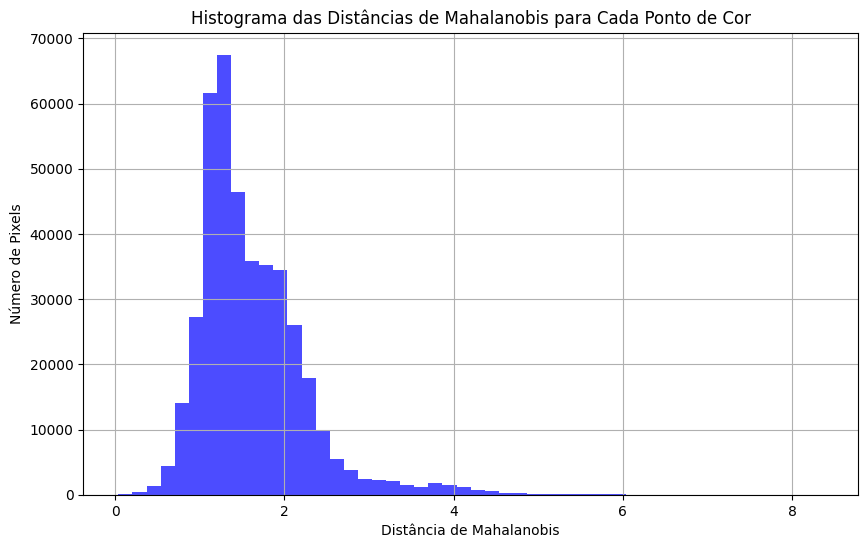

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
imagem = cv2.imread('132623882_2940025776268895_9131617843404056123_n.png')

# Verificar se a imagem foi carregada corretamente
if imagem is None:
    raise ValueError("Não foi possível carregar a imagem. Verifique o caminho fornecido.")

# Separar os canais de cores
b, g, r = cv2.split(imagem)

# Flatten os canais para criar vetores 1D
b_flat = b.flatten()
g_flat = g.flatten()
r_flat = r.flatten()

# Combinar os canais em uma única matriz 2D
matriz_canais = np.vstack((r_flat, g_flat, b_flat)).T

# Calcular a matriz de covariância
matriz_covariancia = np.cov(matriz_canais, rowvar=False)

# Calcular a média dos canais de cores
media_canais = np.mean(matriz_canais, axis=0)

# Calcular a matriz inversa da covariância
inv_cov = np.linalg.inv(matriz_covariancia)

# Função para calcular a distância de Mahalanobis
def distancia_mahalanobis(ponto, media, inv_cov):
    delta = ponto - media
    return np.sqrt(np.dot(np.dot(delta, inv_cov), delta.T))

# Calcular a distância de Mahalanobis para cada ponto de cor
distancias = np.array([distancia_mahalanobis(ponto, media_canais, inv_cov) for ponto in matriz_canais])

# Plotar o histograma das distâncias de Mahalanobis
plt.figure(figsize=(10, 6))
plt.hist(distancias, bins=50, color='blue', alpha=0.7)
plt.xlabel('Distância de Mahalanobis')
plt.ylabel('Número de Pixels')
plt.title('Histograma das Distâncias de Mahalanobis para Cada Ponto de Cor')
plt.grid(True)
plt.show()